##Extracting datas and importing packpages

After installation, restart the runtime

In [8]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [1]:
!pip install geocoder==1.38.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.


In [1]:
#importing packpages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

In [2]:
# download the dataset 
!gdown https://drive.google.com/uc?id=1D6jzFOjydIWJRsXe8wf_yTU7CkEGjaFZ

Downloading...
From: https://drive.google.com/uc?id=1D6jzFOjydIWJRsXe8wf_yTU7CkEGjaFZ
To: /content/dataset_flights_brazil.zip
100% 112M/112M [00:01<00:00, 76.8MB/s]


In [4]:
!unzip dataset_flights_brazil

Archive:  dataset_flights_brazil.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README.md               
replace requirements.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: requirements.txt        
replace transform_to_airports_csv.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: transform_to_airports_csv.py  
replace transform_to_anac_csv.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: transform_to_anac_csv.py  
replace transform_to_graphml.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: transform_to_graphml.py  
replace .git/config? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: .git/config             
replace .git/description? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: .git/description        
replace .git/HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: .git/HEAD               
replace .git/hooks/applypatch-msg.sample? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: .git/hooks/applypat

In [5]:
# download csv files from sources
!python3 extract.py

# transform to final files
!python3 transform_to_anac_csv.py
!python3 transform_to_airports_csv.py
!python3 transform_to_graphml.py

100% 24/24 [00:00<00:00, 90606.03it/s]


##Processing data

In [6]:
air_data = 'data/air_traffic.graphml'

We can visualize the number of Nodes and Edges.

In [7]:
G = nx.read_graphml(air_data)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1124 nodes and 10132 edges


See the representation of nodes in a network

In [8]:
G.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 32.896801, 'longitude': -97.038002}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 40.639801, 'longitude': -73.7789}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 25.79319953918457, 'longitude': -80.29060363769531}, 'SBGL': {'name': 'RIO DE JANEIRO', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458}, 'SBGR': {'name': 'GUARULHOS', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -23.435556411743164, 'longitude': -46.47305679321289}, 'SGAS': {'name': 'ASUNCIÓN', 'region': nan, 'country': 'PARAGUAI', 'latitude': -25.239999771118164, 'longitude': -57.52000045776367}, 'nan': {'name': nan, 'region': nan, 'country': nan, 'latitude': -26.875556, 'longitude': -52.373056}, 'SSBG': {'name': 'BENTO GONÇA

Checks if the attribute 'region' of the node is null, if so, updates it to internacional

In [9]:
for node in G.nodes:
  if pd.isna(G.nodes[node]['region']):
    G.nodes[node]['region'] = 'INTERNACIONAL'

Cheking the regions

In [10]:
check = set()
for node in G.nodes:
  check.add(G.nodes[node]['region'])
print(check)

{'CENTRO-OESTE', 'SUL', 'INTERNACIONAL', 'NORDESTE', 'NORTE', 'SUDESTE', ' ', 'NÃO IDENTIFICADO'}


Sort by Brazilian region

In [11]:
nodes_BR = []
for node in G.nodes:
  if G.nodes[node]['region'] != 'INTERNACIONAL' and G.nodes[node]['region'] != ' ' and G.nodes[node]['region'] != 'NÃO IDENTIFICADO':
    nodes_BR.append(node)

In [12]:
G_BR = G.subgraph(nodes_BR)

In [13]:
print("The network has {} nodes and {} edges".format(G_BR.number_of_nodes(),
                                                     G_BR.number_of_edges()))

The network has 510 nodes and 4568 edges


In [14]:
check = set()
for node in G_BR.nodes:
  check.add(G_BR.nodes[node]['region'])
print(check)

{'SUL', 'CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE'}


In [15]:
nx.write_graphml(G_BR, path=air_data)

Updates the number os nodes and edges

In [16]:
G = nx.read_graphml(air_data)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 510 nodes and 4568 edges


##Assortativity

We see in the graph above that all airport regions are connecting. The North and Southeast regions are the ones with the most incoming connections. We can also observe that there are many flights that go to an airport in the same region. There is a very strong connection between airports in the northeast and southeast.

This type of event is measured by assortativity and is called Homophily. We have that about 0.37 of the trips are between the regions themselves. If this number were negative, the network would be called dissortative.

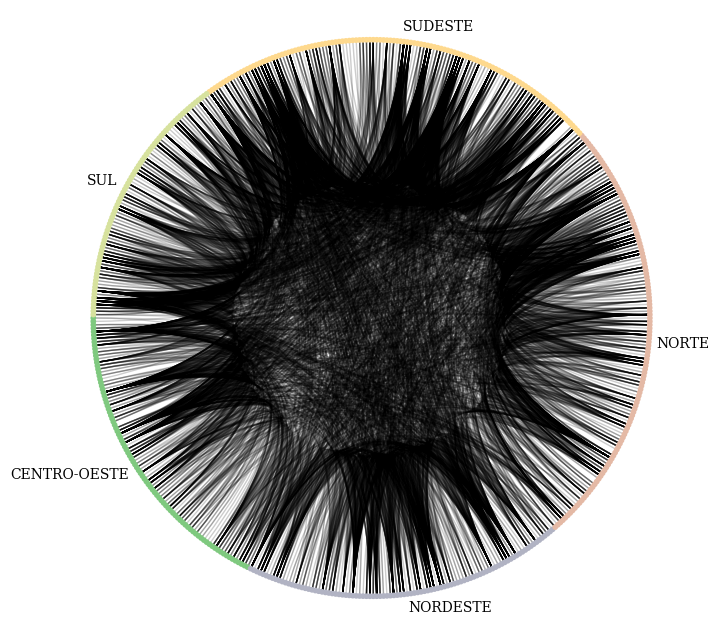

In [17]:
# create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [18]:
nx.attribute_assortativity_coefficient(G, 'region') # assortativity, because the coef > 0

0.37291232237638355

In [19]:
nx.attribute_mixing_matrix(G, 'region')

array([[0.07289842, 0.01204028, 0.01335377, 0.00711471, 0.04049912],
       [0.01204028, 0.05341506, 0.0107268 , 0.02287653, 0.0339317 ],
       [0.01335377, 0.0107268 , 0.08231173, 0.02035902, 0.05461909],
       [0.00711471, 0.02287653, 0.02035902, 0.13222417, 0.02758319],
       [0.04049912, 0.0339317 , 0.05461909, 0.02758319, 0.17294221]])

##Bivariate

In an assortative network, nodes with a higher degree tend to connect with other nodes with a higher degree.

In [20]:
north = []
northeast = []
south = []
southeast = []
central_west = []

for node in G.nodes:
  if G.nodes[node]['region'] == 'NORTE':
    north.append(node)
  elif G.nodes[node]['region'] == 'NORDESTE':
    northeast.append(node)
  elif G.nodes[node]['region'] == 'SUL':
    south.append(node)
  elif G.nodes[node]['region'] == 'SUDESTE':
    southeast.append(node)
  elif G.nodes[node]['region'] == 'CENTRO-OESTE':
    central_west.append(node)

In [21]:
G_north = G.subgraph(north)
G_northeast = G.subgraph(northeast)
G_south = G.subgraph(south)
G_southeast = G.subgraph(southeast)
G_central_west = G.subgraph(central_west)

In [22]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,2,77.650000
1,10,56.160000
2,1,112.913043
3,64,74.125000
4,3,73.432432


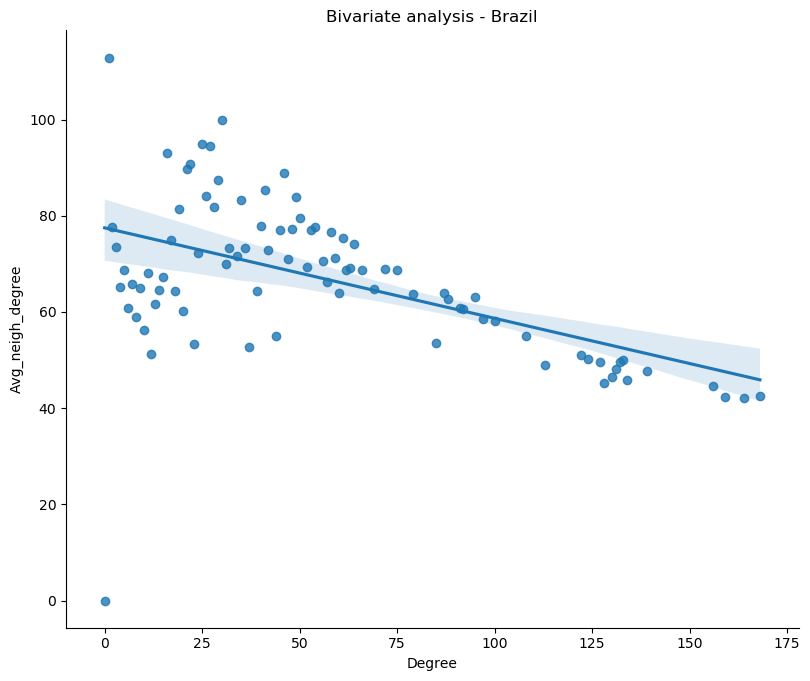

In [23]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Brazil')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [24]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_north).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,6,25.200000
1,13,20.653846
2,7,25.250000
3,4,20.642857
4,1,52.437500


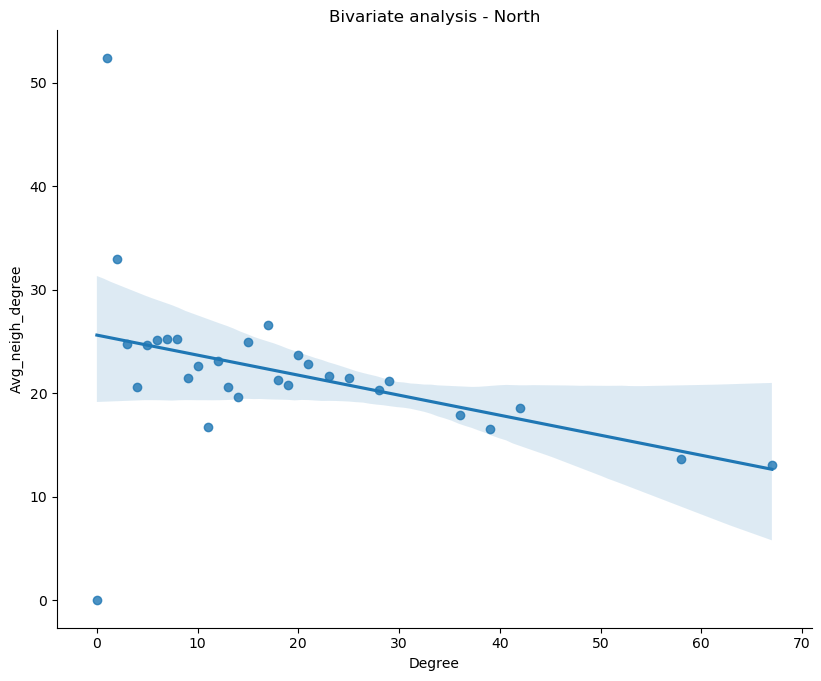

In [25]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - North')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [26]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_northeast).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,15,23.633333
1,5,23.575000
2,22,20.409091
3,2,25.815789
4,9,25.111111


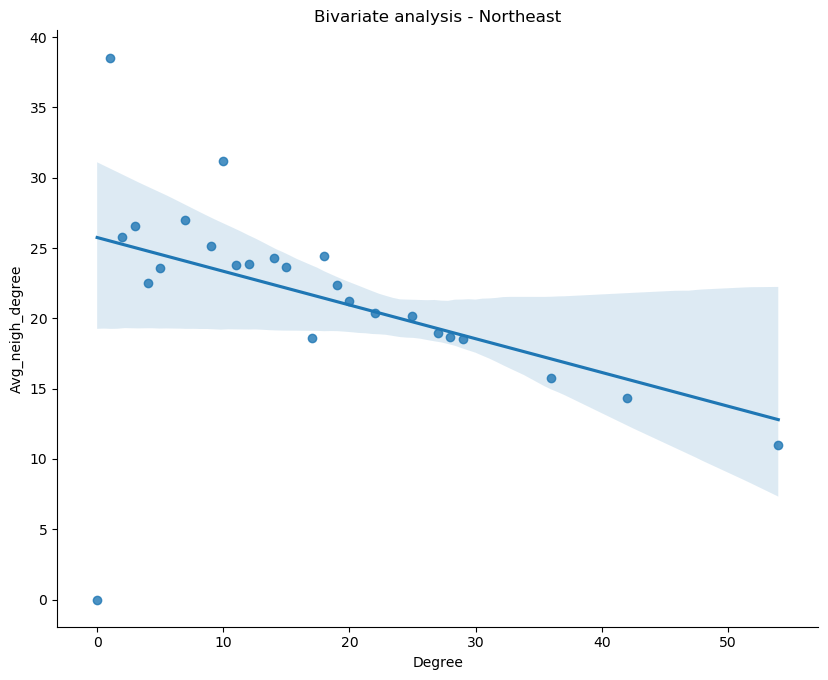

In [27]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Northeast')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [28]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_south).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,2,31.200000
1,6,23.541667
2,13,23.192308
3,7,24.000000
4,15,22.200000


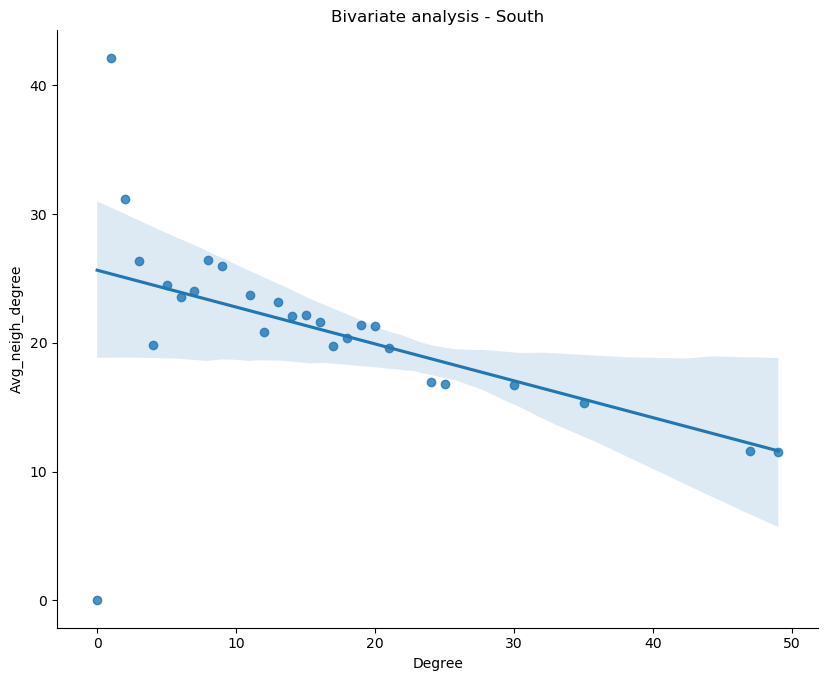

In [29]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - South')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [30]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_southeast).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,6,41.966667
1,5,40.342857
2,1,62.052632
3,61,21.803279
4,0,0.000000


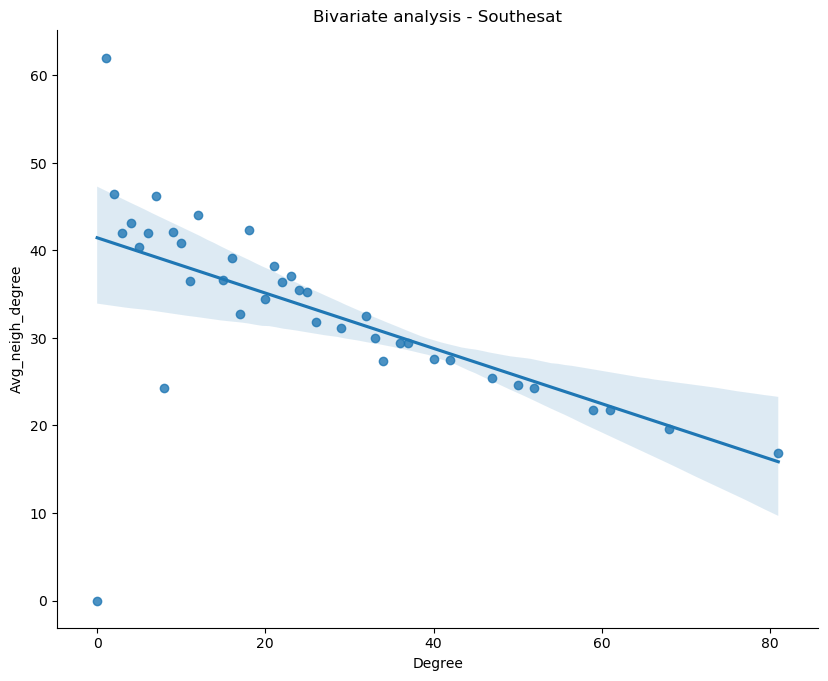

In [31]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Southesat')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [32]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_central_west).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,1,40.000000
1,2,21.894737
2,0,0.000000
3,3,24.095238
4,20,11.050000


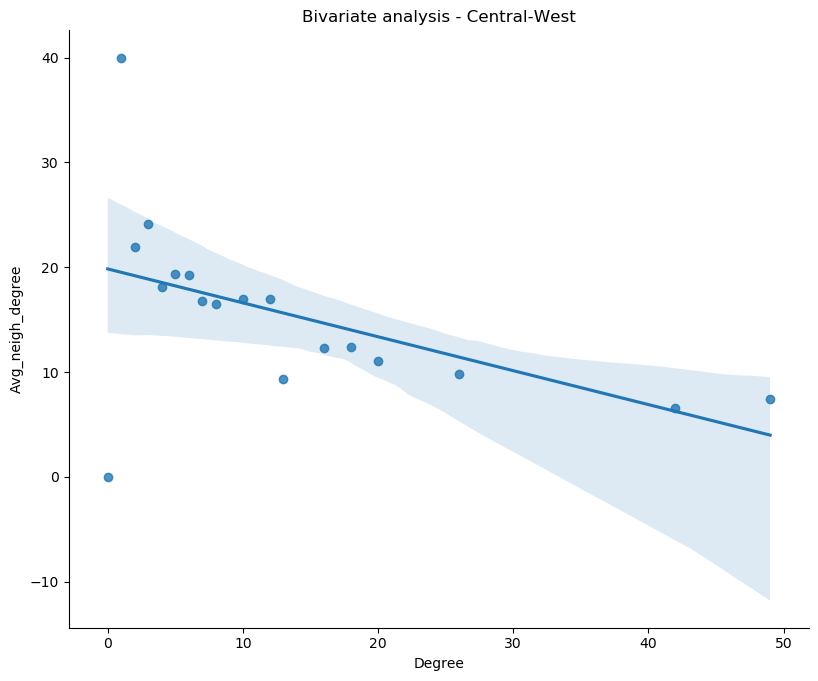

In [33]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Central-West')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

 It was made an analysis of the degree assortativity using the degree_assortativity_coefficient function and making a visual analysis between the degree of the vertex and the average number of neighbors for the airports in Brazil and for the airports for each region of Brazil individualy.

Degree assortativity for Brazil = -0.1961

Degree assortativity for North = -0.2208

Degree assortativity for Northeast = -0.3251

Degree assortativity for South = -0.3528

Degree assortativity for Southeast = -0.3651

Degree assortativity for Central-West = -0.3457



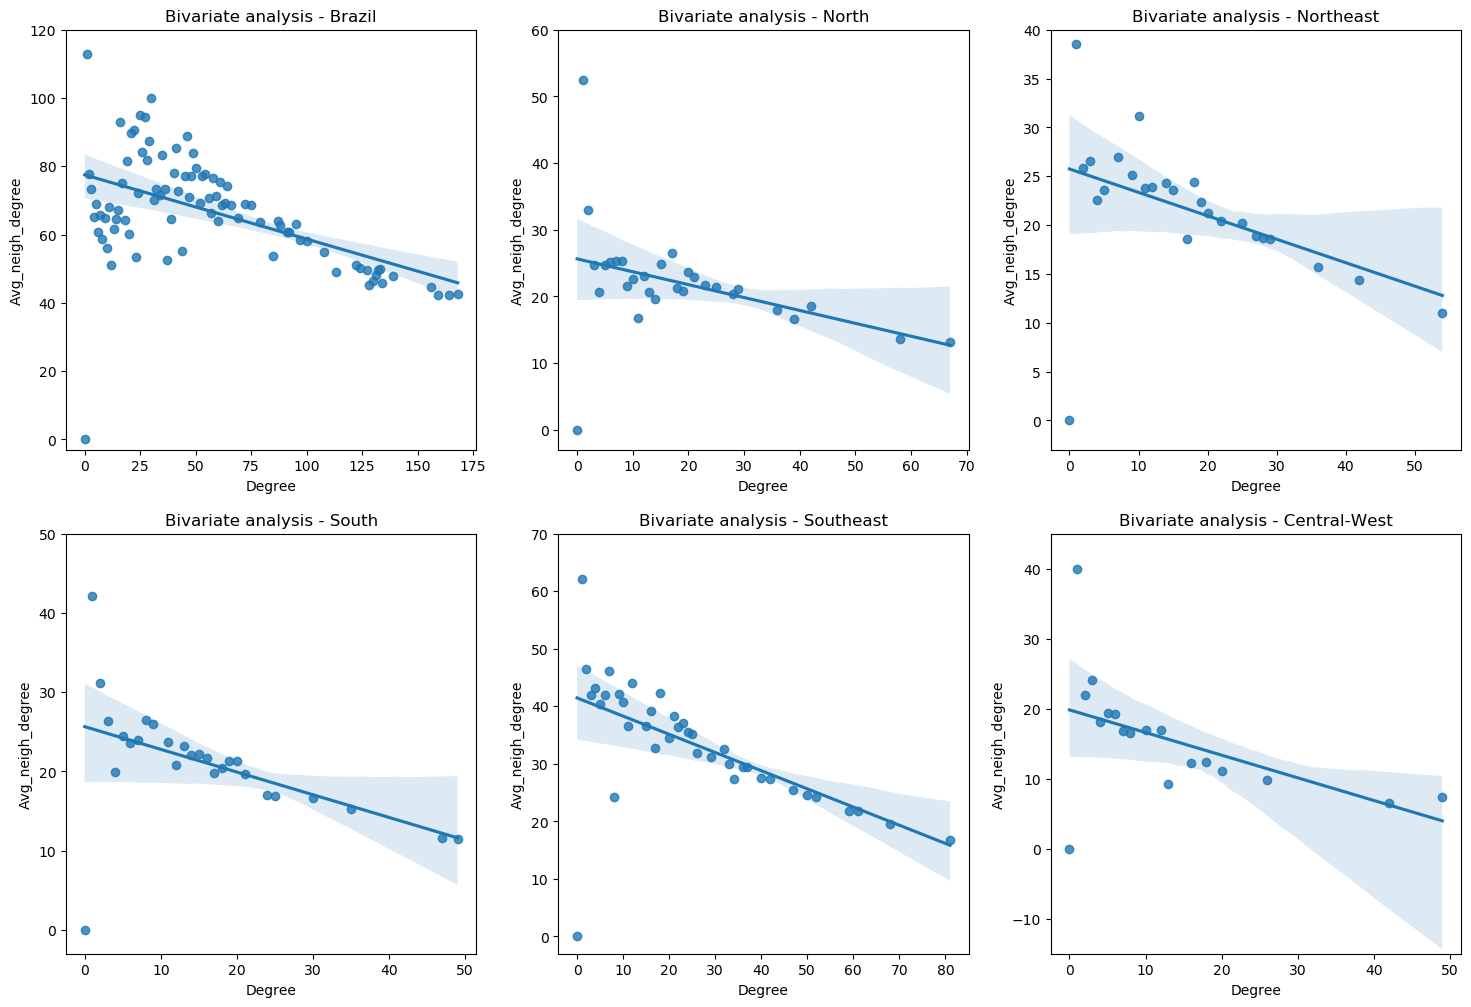

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

networks = [
    (G, 'Brazil', [-3, 120]),
    (G_north, 'North', [-3, 60]),
    (G_northeast, 'Northeast', [-3, 40]),
    (G_south, 'South', [-3, 50]),
    (G_southeast, 'Southeast', [-3, 70]),
    (G_central_west, 'Central-West', [-15, 45])
]

for i, (graph, name, limits) in enumerate(networks):
    row = i // 3
    col = i % 3

    degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(graph).items())
    coef = round(nx.degree_assortativity_coefficient(graph), 4)
    print(f'Degree assortativity for {name} = {coef}\n')

    data = pd.DataFrame({'Degree': degree, 'Avg_neigh_degree': avg_neigh_degree})
    plot = sns.regplot(ax=axes[row, col], data=data, x='Degree', y='Avg_neigh_degree').set(title=f'Bivariate analysis - {name}')
    axes[row, col].set_ylim(limits[0], limits[1])


##Connected components


The components connected in a network are sets of nodes interconnected through direct or indirect connections. They represent distinct units of connectivity within the network and are important for understanding the structure and organization of the network. The analysis of connected components allows identifying groups of interconnected nodes and understanding the global connectivity of the network. For this task, we determined how many connected components there are in the Brazilian air network.


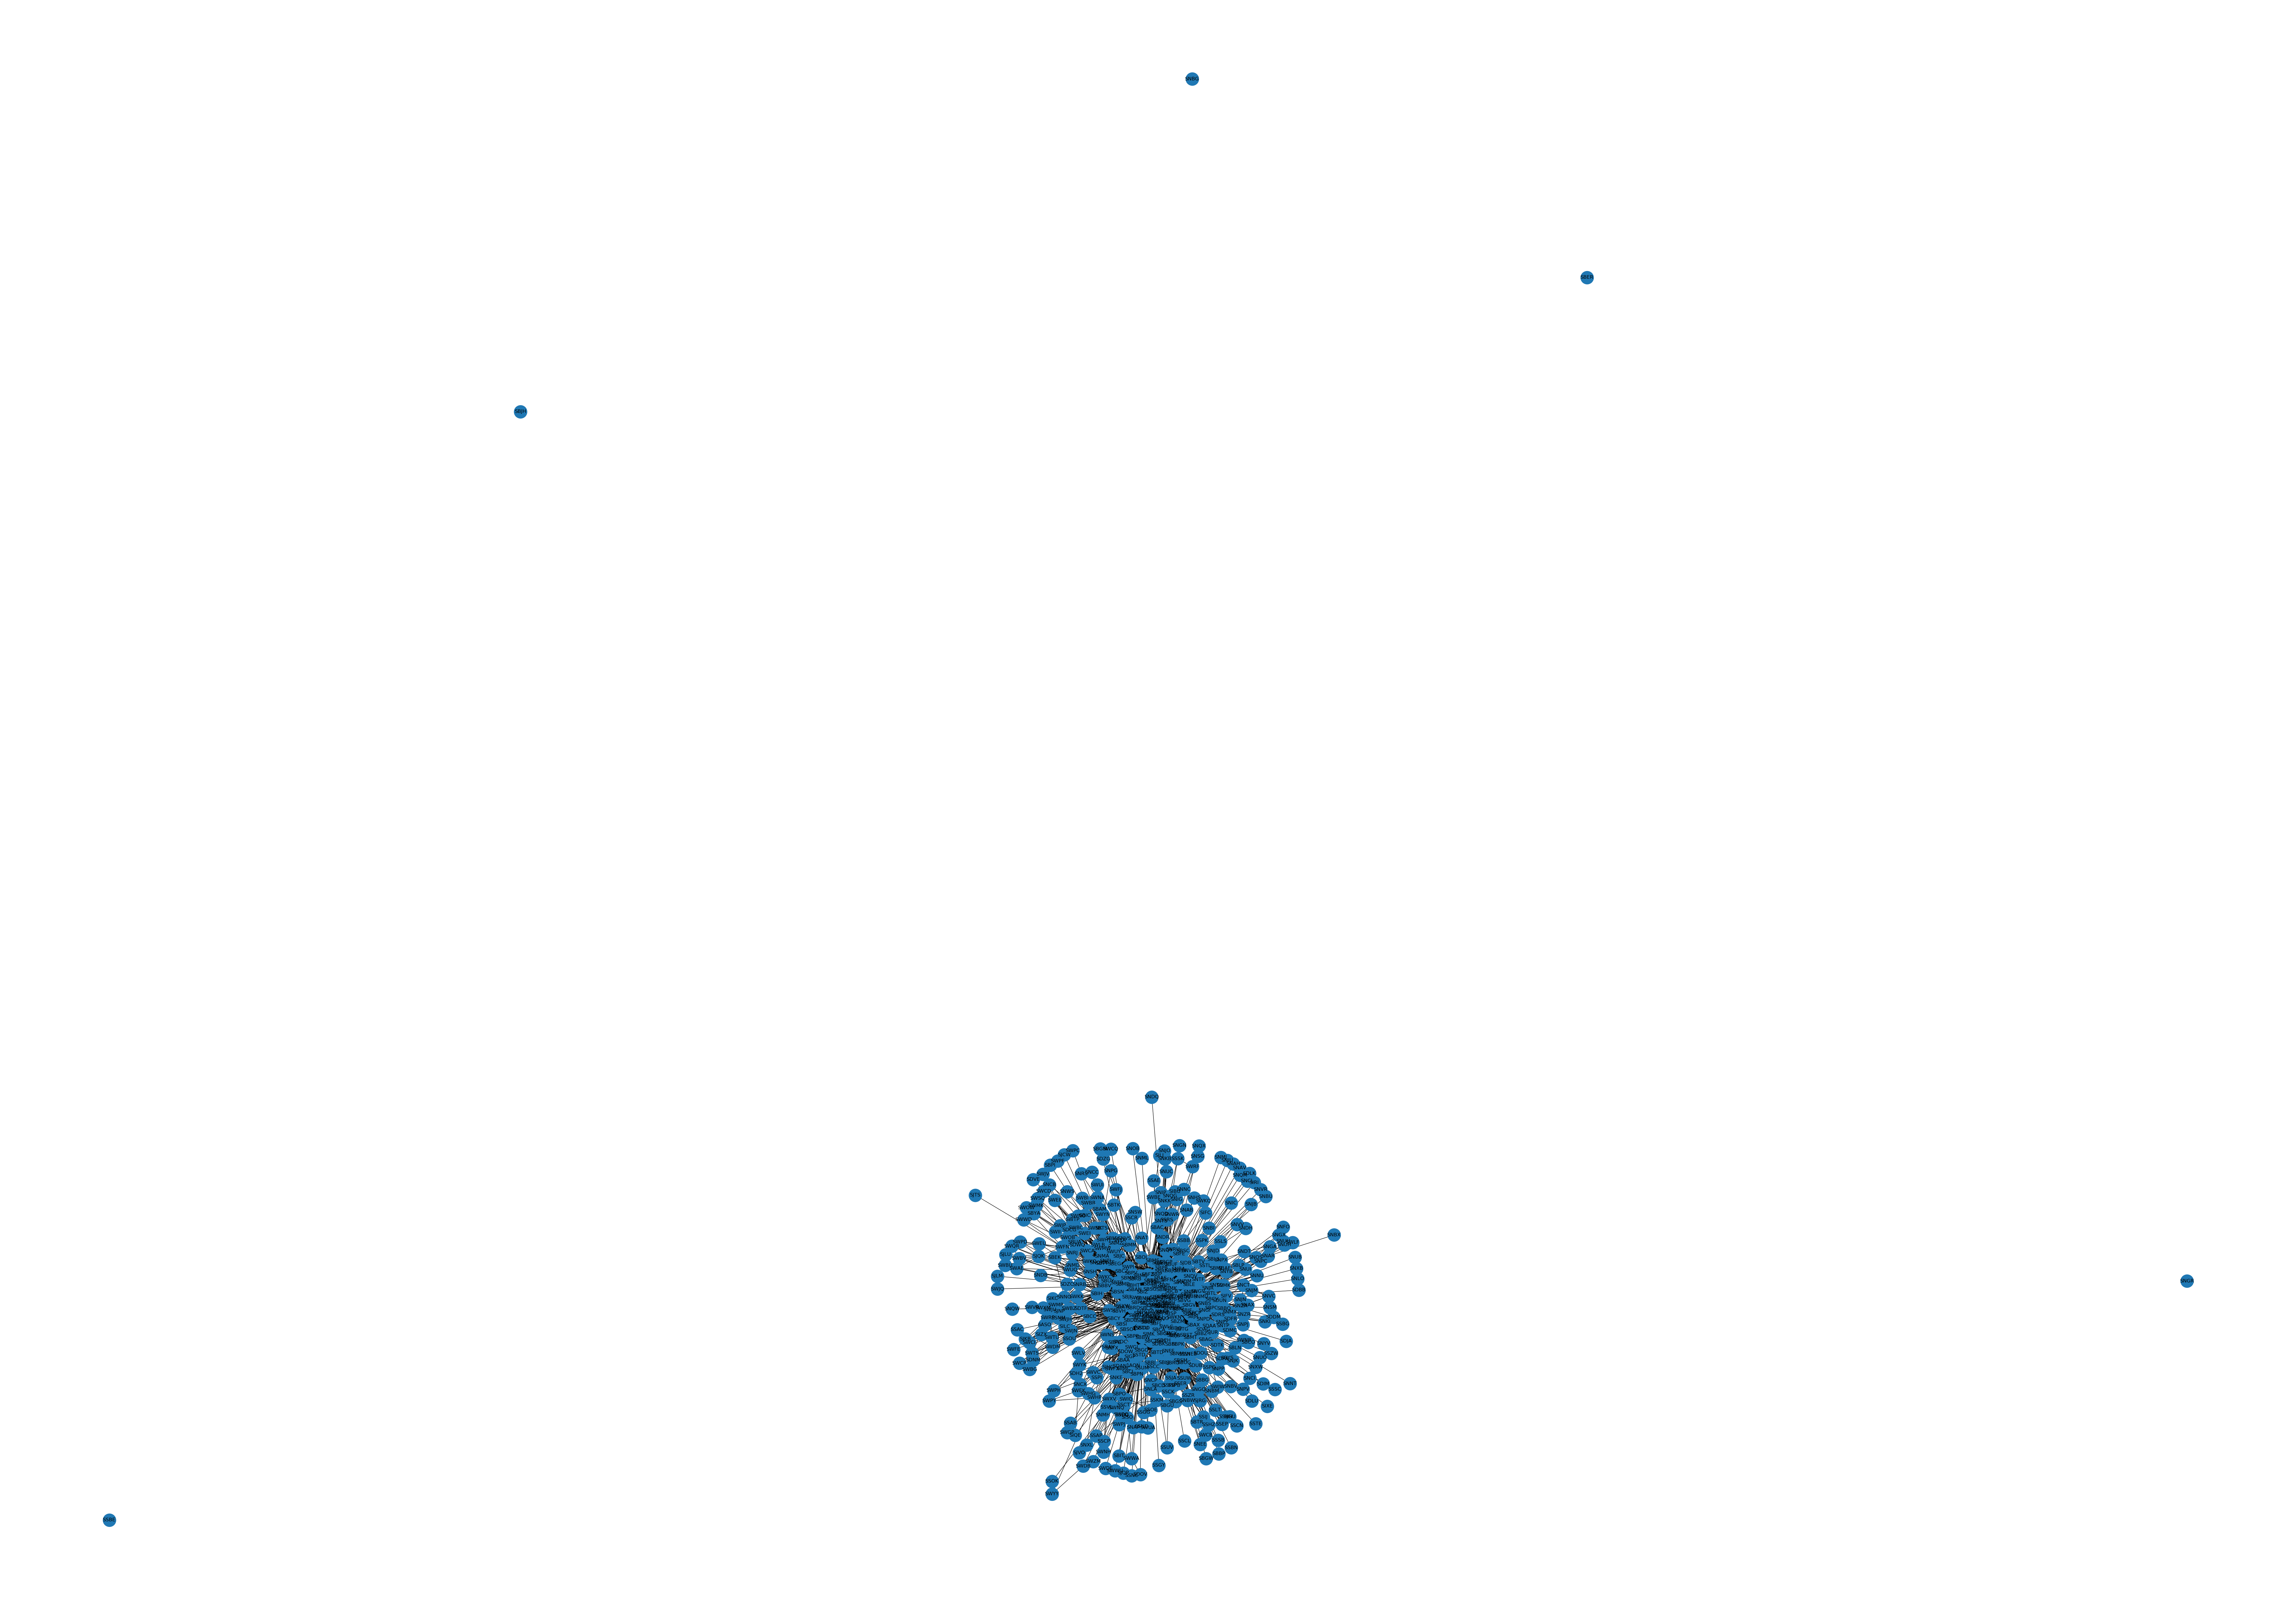

In [35]:
fig, ax = plt.subplots(1, 1,figsize=(100,70))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

Is our subgraph fully connected?






In [ ]:
nx.is_connected(G)

False

How many connected components are there in the Brazilian air mesh?

In [ ]:
nx.number_connected_components(G)

6

In [ ]:
for node in G.nodes:
  print(G.nodes[node]['region'])

NORTE
NORTE
NORTE
SUL
NORTE
CENTRO-OESTE
CENTRO-OESTE
SUL
SUL
SUL
SUDESTE
CENTRO-OESTE
NORDESTE
NORDESTE
SUDESTE
SUDESTE
SUDESTE
SUDESTE
NORTE
NORTE
NORTE
NORTE
CENTRO-OESTE
SUDESTE
SUDESTE
CENTRO-OESTE
NORTE
SUDESTE
NORDESTE
NORTE
NORTE
NORTE
SUDESTE
NORDESTE
NORTE
NORTE
NORTE
CENTRO-OESTE
NORDESTE
NORTE
SUL
NORTE
NORDESTE
CENTRO-OESTE
SUDESTE
SUL
SUDESTE
SUL
SUDESTE
SUL
NORDESTE
NORTE
NORTE
NORDESTE
NORDESTE
SUDESTE
SUDESTE
CENTRO-OESTE
NORTE
NORTE
CENTRO-OESTE
NORDESTE
SUDESTE
CENTRO-OESTE
NORDESTE
NORTE
CENTRO-OESTE
SUDESTE
NORTE
NORTE
SUDESTE
CENTRO-OESTE
NORTE
SUDESTE
NORTE
NORDESTE
CENTRO-OESTE
SUDESTE
NORTE
SUDESTE
SUDESTE
CENTRO-OESTE
NORDESTE
CENTRO-OESTE
SUDESTE
NORTE
SUDESTE
NORDESTE
CENTRO-OESTE
NORTE
SUL
NORDESTE
NORDESTE
NORTE
NORDESTE
NORDESTE
SUDESTE
NORDESTE
NORDESTE
SUDESTE
SUDESTE
SUDESTE
SUL
CENTRO-OESTE
NORDESTE
NORTE
CENTRO-OESTE
NORTE
NORTE
NORTE
SUDESTE
SUDESTE
SUDESTE
NORTE
SUDESTE
NORTE
SUDESTE
NORTE
SUL
SUDESTE
NORTE
CENTRO-OESTE
SUDESTE
SUDESTE
SUDESTE
SUDE

In [ ]:
for component in nx.connected_components(G):
  print(component)

{'SWII', 'SNFX', 'SNOX', 'SSUW', 'SNNG', 'SWDB', 'SWCI', 'SBGU', 'SSNH', 'SSTE', 'SBUR', 'SWRP', 'SNJK', 'SNDH', 'SBPI', 'SBFC', 'SNBM', 'SNPX', 'SSKW', 'SBAM', 'SDWQ', 'SWPF', 'SWYY', 'SBBQ', 'SBBP', 'SWFX', 'SNCC', 'SWLF', 'SNVV', 'SWMK', 'SBRB', 'SJGU', 'SNRS', 'SBBV', 'SNMA', 'SBTT', 'SSNM', 'SBMO', 'SBTF', 'SSZW', 'SBJE', 'SNBV', 'SJDB', 'SDAG', 'SBSM', 'SBDN', 'SBNM', 'SBMI', 'SSAE', 'SNAT', 'SBIH', 'SBHT', 'SNSG', 'SBJP', 'SBRP', 'SNDT', 'SWNS', 'SNWR', 'SNYV', 'SWKN', 'SWRF', 'SBRJ', 'SSAC', 'SNVB', '1AON', 'SWHP', 'SDAM', 'SNEB', 'SWKK', 'SDIM', 'SJCW', 'SWTS', 'SNZA', 'SWNO', 'SNDR', 'SWDE', 'SNFE', 'SWJP', 'SNVC', 'SBAG', 'SJKB', 'SNJB', 'SDPA', 'SWIQ', 'SJLM', 'SNBA', 'SNUC', 'SSDO', 'SNXW', 'SBTR', 'SNRJ', 'SNAH', 'SBMN', 'SIBU', 'SNIP', 'SBAU', 'SNVR', 'SNRU', 'SNUB', 'SBUL', 'SBAV', 'SSHZ', 'SWVC', 'SBFN', 'SWTP', 'SWGP', 'SWFN', 'SNDC', 'SJTS', 'SBMT', 'SBUY', 'SBMK', 'SBAQ', 'SWMW', 'SBGR', 'SNZR', 'SNPV', 'SSCT', 'SNCX', 'SWFJ', 'SWJQ', 'SDRS', 'SNPY', 'SNGV', 'SNTO',

In [ ]:
region_counts = {'NORDESTE': 0, 'SUDESTE': 0, 'NORTE': 0, 'SUL': 0, 'CENTRO-OESTE': 0}

for component in nx.connected_components(G):
    for node in component:
        region = G.nodes[node]['region']
        if region in region_counts:
            region_counts[region] += 1

    total = sum(region_counts.values())

    print(component)
    for region, count in region_counts.items():
        print(f'{region}: {count}')
        percentage = count / total * 100
        print(f'{region}: {percentage:.2f}%')
    print('\n')

    region_counts = {'NORDESTE': 0, 'SUDESTE': 0, 'NORTE': 0, 'SUL': 0, 'CENTRO-OESTE': 0}


{'SWII', 'SNFX', 'SNOX', 'SSUW', 'SNNG', 'SWDB', 'SWCI', 'SBGU', 'SSNH', 'SSTE', 'SBUR', 'SWRP', 'SNJK', 'SNDH', 'SBPI', 'SBFC', 'SNBM', 'SNPX', 'SSKW', 'SBAM', 'SDWQ', 'SWPF', 'SWYY', 'SBBQ', 'SBBP', 'SWFX', 'SNCC', 'SWLF', 'SNVV', 'SWMK', 'SBRB', 'SJGU', 'SNRS', 'SBBV', 'SNMA', 'SBTT', 'SSNM', 'SBMO', 'SBTF', 'SSZW', 'SBJE', 'SNBV', 'SJDB', 'SDAG', 'SBSM', 'SBDN', 'SBNM', 'SBMI', 'SSAE', 'SNAT', 'SBIH', 'SBHT', 'SNSG', 'SBJP', 'SBRP', 'SNDT', 'SWNS', 'SNWR', 'SNYV', 'SWKN', 'SWRF', 'SBRJ', 'SSAC', 'SNVB', '1AON', 'SWHP', 'SDAM', 'SNEB', 'SWKK', 'SDIM', 'SJCW', 'SWTS', 'SNZA', 'SWNO', 'SNDR', 'SWDE', 'SNFE', 'SWJP', 'SNVC', 'SBAG', 'SJKB', 'SNJB', 'SDPA', 'SWIQ', 'SJLM', 'SNBA', 'SNUC', 'SSDO', 'SNXW', 'SBTR', 'SNRJ', 'SNAH', 'SBMN', 'SIBU', 'SNIP', 'SBAU', 'SNVR', 'SNRU', 'SNUB', 'SBUL', 'SBAV', 'SSHZ', 'SWVC', 'SBFN', 'SWTP', 'SWGP', 'SWFN', 'SNDC', 'SJTS', 'SBMT', 'SBUY', 'SBMK', 'SBAQ', 'SWMW', 'SBGR', 'SNZR', 'SNPV', 'SSCT', 'SNCX', 'SWFJ', 'SWJQ', 'SDRS', 'SNPY', 'SNGV', 'SNTO',

##Shortest Path



Create a simulated scenario, where you want to take a trip with the following route:

    City 1 (North) to city 2 (South)
    City 2 (South) to city 3 (Northeast)
    City 3 (Northeast) to city 4 (Central-West)
    City 4 (Central-West) to city 5 (Southeast)



What would be the shortest path for each route between airports?

In [ ]:
cities = {
    'North': 'SBAM', #City: AMAPÁ
    'Northeast': 'SBAR', #City: ARACAJÚ
    'South': 'SBBG', #City: BAGÉ
    'Southeast': 'SBGR', #City: GUARULHOS
    'Central-West': 'SBBH' #City: BELO HORIZONTE
}

North to South

In [ ]:
path1 = nx.shortest_path(G, cities['North'], cities['South'])
path1_len = nx.shortest_path_length(G, cities['North'], cities['South'])

c1 = G.nodes[path1[0]]['name']
c2 = G.nodes[path1[1]]['name'] 
c3 = G.nodes[path1[2]]['name'] 
c4 = G.nodes[path1[3]]['name']  

print(f'Shortest path from North to South: {path1}')
print(f'Shortest path length from North to South: {path1_len}')
print(f'Cities in this path: {c1} -> {c2} -> {c3} -> {c4}')

Shortest path from North to South: ['SBAM', 'SBMQ', 'SBGL', 'SBBG']
Shortest path length from North to South: 3
Cities in this path: AMAPÁ -> MACAPÁ -> RIO DE JANEIRO -> BAGÉ


South to Northeast

In [ ]:
path2 = nx.shortest_path(G, cities['South'], cities['Northeast'])
path2_len = nx.shortest_path_length(G, cities['South'], cities['Northeast'])

c5 = G.nodes[path2[0]]['name']
c6 = G.nodes[path2[1]]['name'] 
c7 = G.nodes[path2[2]]['name'] 

print(f'Shortest path from South to Northeast: {path2}')
print(f'Shortest path length from South to Northeast: {path2_len}')
print(f'Cities in this path: {c5} -> {c6} -> {c7}')

Shortest path from South to Northeast: ['SBBG', 'SBGL', 'SBAR']
Shortest path length from South to Northeast: 2
Cities in this path: BAGÉ -> RIO DE JANEIRO -> ARACAJU


Northeast to Central-West

In [ ]:
path3 = nx.shortest_path(G, cities['Northeast'], cities['Central-West'])
path3_len = nx.shortest_path_length(G, cities['Northeast'], cities['Central-West'])

c8 = G.nodes[path3[0]]['name']
c9 = G.nodes[path3[1]]['name']

print(f'Shortest path from Northeast to Central-West: {path3}')
print(f'Shortest path length from Northeast to Central-West: {path3_len}')
print(f'Cities in this path: {c8} -> {c9}')

Shortest path from Northeast to Central-West: ['SBAR', 'SBBH']
Shortest path length from Northeast to Central-West: 1
Cities in this path: ARACAJU -> BELO HORIZONTE


Central-West to Southeast

In [7]:
path4 = nx.shortest_path(G, cities['Central-West'], cities['Southeast'])
path4_len = nx.shortest_path_length(G, cities['Central-West'], cities['Southeast'])

c10 = G.nodes[path4[0]]['name']
c11 = G.nodes[path4[1]]['name']

print(f'Shortest path from Central-West to Southeast: {path4}')
print(f'Shortest path length from Central-West to Southeast: {path4_len}')
print(f'Cities in this path: {c10} -> {c11}')

NameError: ignored

Complete

In [ ]:
path_comp = path1 + path2 + path3 + path4
path_comp_len = path1_len + path2_len + path3_len + path4_len

print(f'Shortest path from North -> South -> Northeast -> Central-West -> Southeast: {path_comp}')
print(f'Shortest path length from North -> South -> Northeast -> Central-West -> Southeast: {path_comp_len}')
print(f'Cities in this path: {c1} -> {c2} -> {c3} -> {c5} -> {c6} -> {c8} -> {c9} -> {c11}')

Shortest path from North -> South -> Northeast -> Central-West -> Southeast: ['SBAM', 'SBMQ', 'SBGL', 'SBBG', 'SBBG', 'SBGL', 'SBAR', 'SBAR', 'SBBH', 'SBBH', 'SBGR', 'SBCC']
Shortest path length from North -> South -> Northeast -> Central-West -> Southeast: 8
Cities in this path: AMAPÁ -> MACAPÁ -> RIO DE JANEIRO -> BAGÉ -> RIO DE JANEIRO -> ARACAJU -> BELO HORIZONTE -> GUARULHOS


##Clustering coefficient

Clustering coefficient of each node. This coefficient tells us how a node is related to its neighbors.

In [ ]:
nx.clustering(G)

{'SWII': 1.0,
 'SNFX': 0.7636363636363637,
 'SNOX': 0.6274509803921569,
 'SSUW': 0.8,
 'SNNG': 0.46153846153846156,
 'SWDB': 0,
 'SWCI': 1.0,
 'SSNH': 1.0,
 'SBGU': 1.0,
 'SSTE': 0,
 'SBUR': 0.5224748810153358,
 'SWRP': 0.5555555555555556,
 'SNJK': 1.0,
 'SNDH': 1.0,
 'SBPI': 0,
 'SBFC': 0.7139784946236559,
 'SNBM': 1.0,
 'SNPX': 1.0,
 'SSKW': 0.7362637362637363,
 'SBAM': 0.6666666666666666,
 'SDWQ': 1.0,
 'SWPF': 0,
 'SWYY': 0,
 'SBBQ': 0.8095238095238095,
 'SBBP': 0,
 'SWFX': 0.3384615384615385,
 'SNCC': 1.0,
 'SWLF': 0,
 'SNVV': 1.0,
 'SWMK': 1.0,
 'SBRB': 0.5725689404934688,
 'SJGU': 0,
 'SBJH': 0,
 'SNRS': 0,
 'SBBV': 0.4,
 'SNMA': 0.7238095238095238,
 'SBTT': 0.4308300395256917,
 'SSNM': 1.0,
 'SBMO': 0.5358558558558558,
 'SBTF': 0.34984984984984985,
 'SSZW': 0,
 'SNBV': 1.0,
 'SBJE': 0.8051948051948052,
 'SJDB': 1.0,
 'SDAG': 0.8,
 'SBSM': 0.46774193548387094,
 'SBDN': 0.5647721454173067,
 'SBNM': 0.6376811594202898,
 'SBMI': 1.0,
 'SSAE': 0,
 'SNAT': 0.8571428571428571,
 'SBIH'

In [ ]:
nx.average_clustering(G)

0.6298820670024331

Clustering coefficient of each region

North

In [ ]:
subgrafo_norte = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'NORTE'])

In [ ]:
nx.clustering(subgrafo_norte)
nx.average_clustering(subgrafo_norte)

0.6259209801045801

Northeast

In [ ]:
subgrafo_nordeste = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'NORDESTE'])

In [ ]:
nx.clustering(subgrafo_nordeste)
nx.average_clustering(subgrafo_nordeste)

0.5016001281768834

Midwest





In [ ]:
subgrafo_centroOeste = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'CENTRO-OESTE'])

In [ ]:
nx.clustering(subgrafo_centroOeste)
nx.average_clustering(subgrafo_centroOeste)

0.5556488814335723

Southeast

In [ ]:
subgrafo_sudeste = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'SUDESTE'])

In [ ]:
nx.clustering(subgrafo_sudeste)
nx.average_clustering(subgrafo_sudeste)

0.6147935384470572

South

In [ ]:
subgrafo_sul = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'SUL'])

In [ ]:
nx.clustering(subgrafo_sul)
nx.average_clustering(subgrafo_sul)

0.5848627053938165